In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

%matplotlib inline
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


Num GPUs Available:  1


In [84]:
tf.__version__

'2.2.0'

In [85]:
iris = load_iris()
X = iris.data[:, (2, 3)]
y = (iris.target == 0).astype(np.int)

perceptron_clf = Perceptron()
perceptron_clf.fit(X, y)

y_pred = perceptron_clf.predict([[2., 0.5]]); y_pred

array([0])

## Neural Network for MNIST Dataset

In [86]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

In [87]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
X_test = X_test / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [88]:
X_train.shape

(55000, 28, 28)

<ipython-input-89-428e82df319c>:1: DeprecationWarning: This function is deprecated. Please call randint(0, 55000 + 1) instead
  plt.imshow(X_train[np.random.random_integers(0, X_train.shape[0])], cmap='gray')


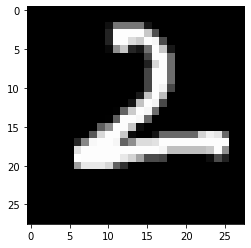

In [89]:
plt.imshow(X_train[np.random.random_integers(0, X_train.shape[0])], cmap='gray')

In [90]:
# Functional calls
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [91]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_7 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [92]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [93]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.6163 - accuracy: 0.8414 - val_loss: 0.3111 - val_accuracy: 0.9152
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2894 - accuracy: 0.9181 - val_loss: 0.2497 - val_accuracy: 0.9314
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2393 - accuracy: 0.9315 - val_loss: 0.2060 - val_accuracy: 0.9418
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2047 - accuracy: 0.9412 - val_loss: 0.1799 - val_accuracy: 0.9498
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1790 - accuracy: 0.9487 - val_loss: 0.1602 - val_accuracy: 0.9572
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1581 - accuracy: 0.9549 - val_loss: 0.1442 - val_accuracy: 0.9608
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1417 - accuracy: 0.9597 - val_loss: 0.1398 - val_accuracy:

### Initial Evaluation

In [101]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score

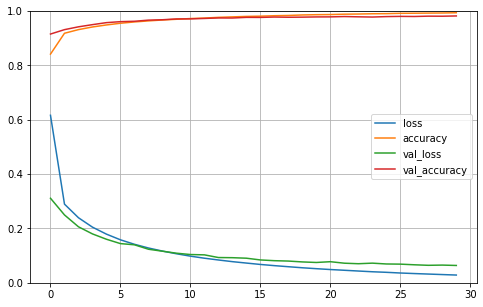

In [102]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [98]:
y_pred = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


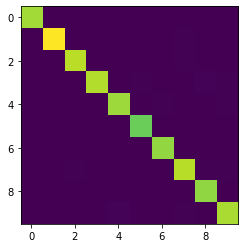

In [104]:
plt.imshow(confusion_matrix(y_pred, y_test))

### Subclassing API for Same Model

In [147]:
class MNISTModel(keras.Model):
    def __init__(self, units1=300, units2=100, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.input_process = keras.layers.Flatten(input_shape=[28, 28])
        self.hidden1 = keras.layers.Dense(units1, activation=activation)
        self.hidden2 = keras.layers.Dense(units2, activation=activation)
        self.main_output = keras.layers.Dense(10, activation="softmax")
    
    def call(self, inputs):
        inputs = self.input_process(inputs)
        hidden1 = self.hidden1(inputs)
        hidden2 = self.hidden2(hidden1)
        main_output = self.main_output(hidden2)
        return main_output

In [152]:
model = MNISTModel()
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [149]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5843 - accuracy: 0.8503 - val_loss: 0.3066 - val_accuracy: 0.9186
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2867 - accuracy: 0.9188 - val_loss: 0.2366 - val_accuracy: 0.9354
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2361 - accuracy: 0.9334 - val_loss: 0.2094 - val_accuracy: 0.9434
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2026 - accuracy: 0.9430 - val_loss: 0.1776 - val_accuracy: 0.9510
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1770 - accuracy: 0.9499 - val_loss: 0.1631 - val_accuracy: 0.9560
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1569 - accuracy: 0.9554 - val_loss: 0.1461 - val_accuracy: 0.9598
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1409 - accuracy: 0.9602 - val_loss: 0.1379 - val_accuracy:

### TensorBoard

In [153]:
import os
from pathlib import Path
root_logdir = os.path.join(os.curdir, "logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

In [ ]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                validation_data=(X_valid, y_valid),
                callbacks=[tensorboard_cb])

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6151 - accuracy: 0.8427 - val_loss: 0.3031 - val_accuracy: 0.9182
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2838 - accuracy: 0.9199 - val_loss: 0.2331 - val_accuracy: 0.9340
Epoch 3/30
1695/1719 [============================>.] - ETA: 0s - loss: 0.2317 - accuracy: 0.9347